# 합성곱 신경망을 사용한 이미지 분류

### 합성곱 신경망 설명

#### 기본 개념 설명
#### 커널or필터(도장으로 설명)
#### 패딩 설명
#### 스트라이드 설명
#### 풀링 설명

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST 데이터 불러오기

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

# CNN을 적용하려면 이미지의 차원이 있어야함
# 흑백이미지는 1차원이므로 1을 추가(컬러이미지일경우 3)
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
train_scaled.shape

(48000, 28, 28, 1)

## 합성곱 신경망 만들기

In [4]:
model = keras.Sequential()

In [5]:
# 32(커널수), kernel_size(3이면 3,3(보통 3,3 또는 5,5)), 활성화함수=relu, 패딩값 차이없이 생성
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

In [6]:
# 맥스풀링 적용(2,2)
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               627300    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

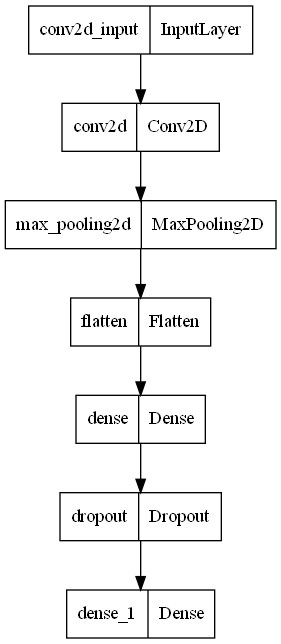

In [16]:
keras.utils.plot_model(model)

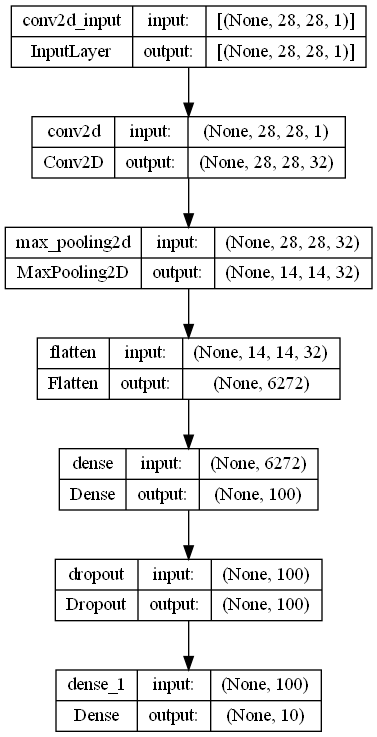

In [10]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20


1500/1500 [==============================] - 11s 7ms/step - loss: 0.5065 - accuracy: 0.8215 - val_loss: 0.3192 - val_accuracy: 0.8822
Epoch 2/20
  32/1500 [..............................] - ETA: 4s - loss: 0.3391 - accuracy: 0.8672

C:\Users\wlsgu\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 10s 7ms/step - loss: 0.3432 - accuracy: 0.8771 - val_loss: 0.2835 - val_accuracy: 0.8938
Epoch 3/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3029 - accuracy: 0.8910 - val_loss: 0.2632 - val_accuracy: 0.9022
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2786 - accuracy: 0.8986 - val_loss: 0.2540 - val_accuracy: 0.9070
Epoch 5/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2554 - accuracy: 0.9063 - val_loss: 0.2524 - val_accuracy: 0.9047
Epoch 6/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2410 - accuracy: 0.9117 - val_loss: 0.2514 - val_accuracy: 0.9104
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2245 - accuracy: 0.9167 - val_loss: 0.2372 - val_accuracy: 0.9150
Epoch 8/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2088 - accuracy: 0.9227 - val_loss: 0.2449 - val_accuracy: 0.9

In [12]:
import matplotlib.pyplot as plt

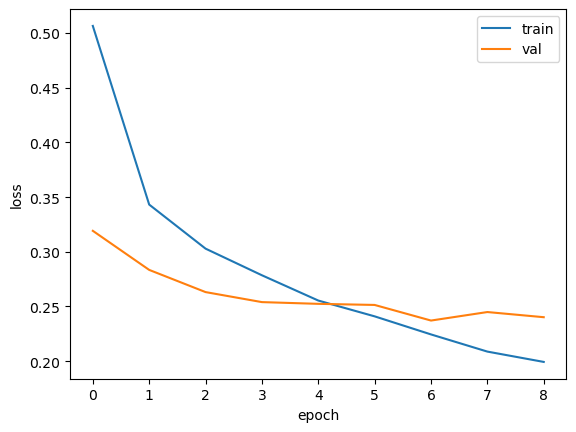

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.2372 - accuracy: 0.9150


[0.23715049028396606, 0.9150000214576721]

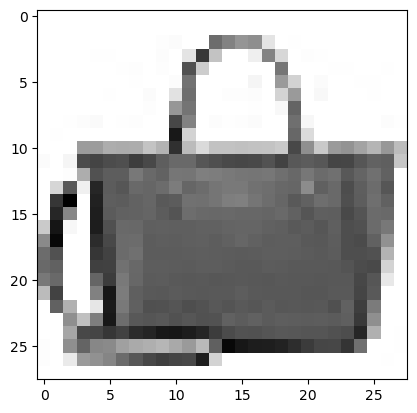

In [15]:
# 밸리데이션 셋 첫번째 이미지에 대한 예측값
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [33]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 80ms/step
[[4.3851251e-15 1.3696277e-19 6.6648390e-17 9.8150360e-17 2.0044501e-15
  4.1628962e-14 1.4486054e-16 3.1740681e-15 1.0000000e+00 4.8875559e-16]]


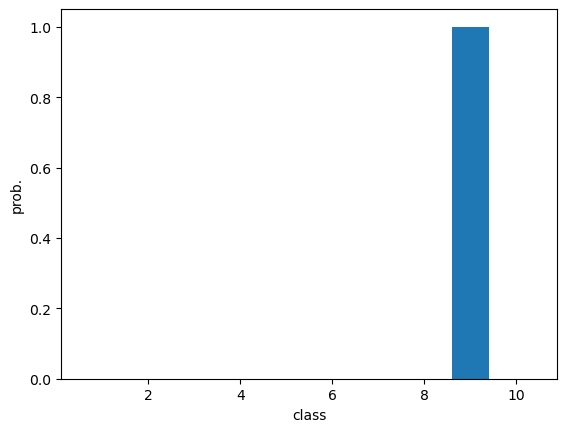

In [34]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [35]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [36]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [37]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [38]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 1ms/step - loss: 0.2606 - accuracy: 0.9058


[0.2605626583099365, 0.9057999849319458]